# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20, 15]

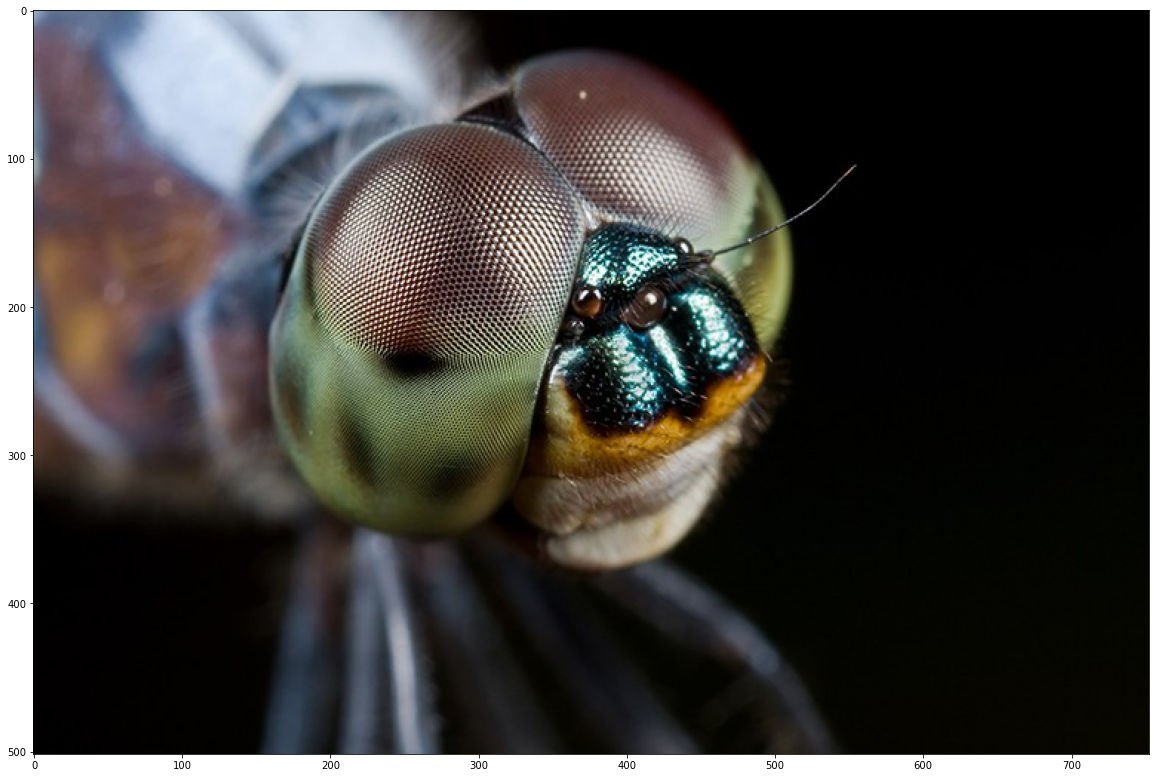

In [2]:
img = cv2.imread('dragonfly.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

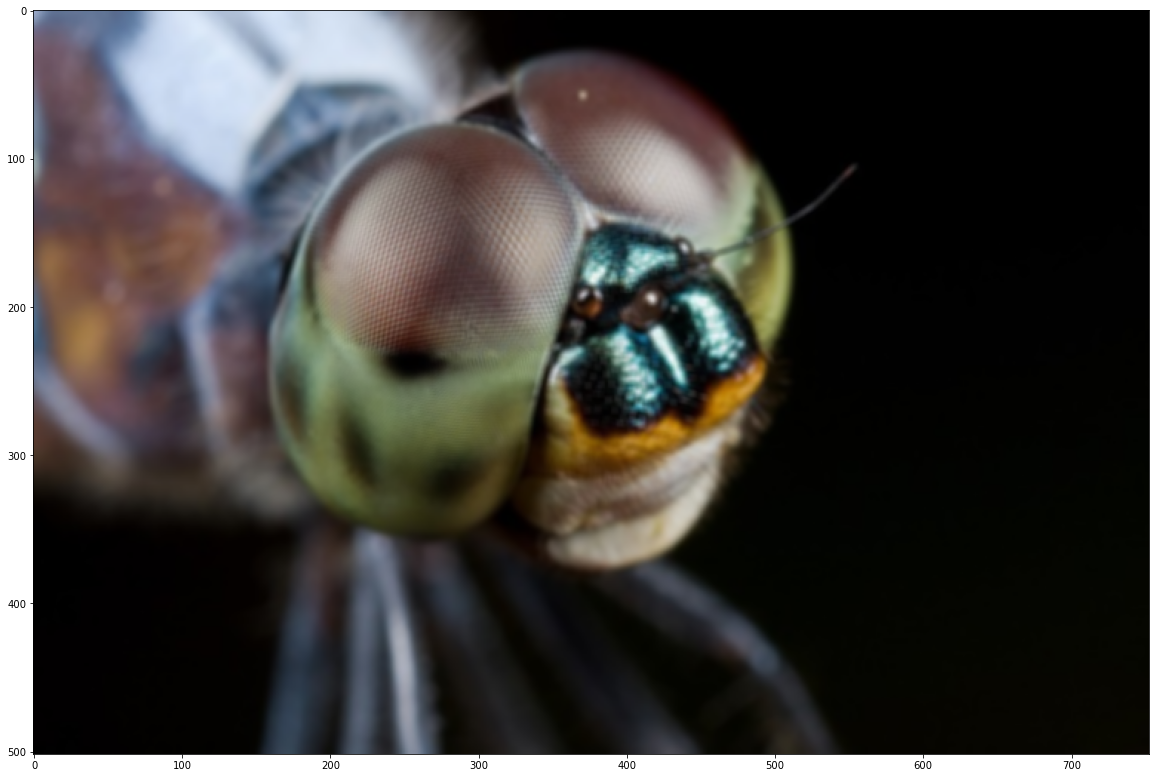

In [3]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, ksize=(5,5), sigmaX=3)
plt.imshow(unsharp)

(<AxesSubplot:title={'center':'Diff mask'}>,
 Text(0.5, 1.0, 'Diff mask'))

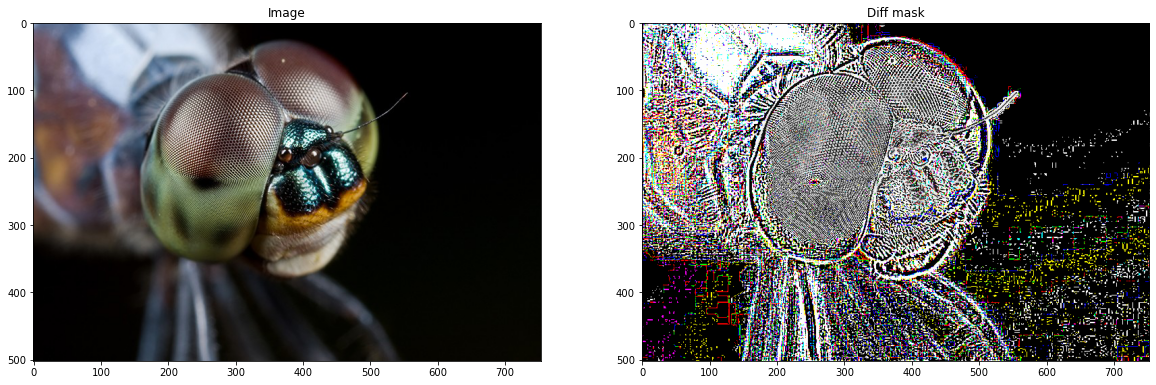

In [4]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
img = img.astype(np.float32)
unsharp = unsharp.astype(np.float32)
diff = img - unsharp

plt.subplot(121), plt.imshow(img.astype('uint8')), plt.title('Image')
plt.subplot(122), plt.imshow(diff.astype('uint8')), plt.title('Diff mask')

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x14e96a1fc10>)

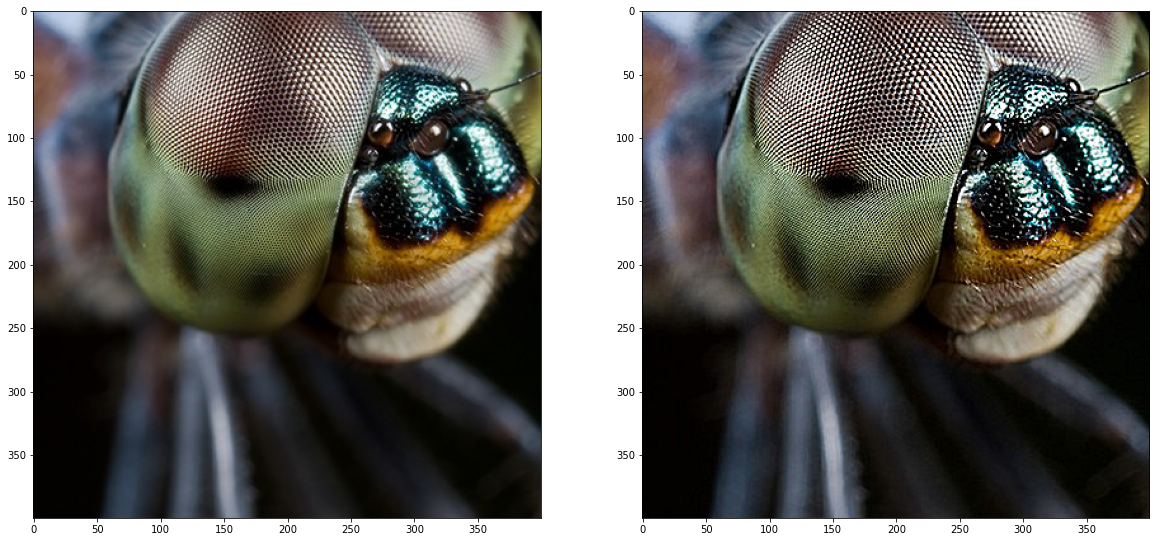

In [11]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
sharpened = img + diff*1.5
np.clip(sharpened, 0, 255, out=sharpened)
# plt.subplot(121), plt.imshow(img.astype('uint8')), plt.title('Original Image')
# plt.subplot(122), plt.imshow(sharpened.astype('uint8')), plt.title('USM Applied')
# plt.imshow(sharpened.astype(np.uint8))
plt.subplot(121), plt.imshow(img.astype('uint8')[100:500, 100:500, :])
plt.subplot(122), plt.imshow(sharpened.astype('uint8')[100:500, 100:500, :])

### Questions
 * What is a good (reasonable) value for the `amount` parameter?
        A. 0.5 - 1.5 is a good choice for 'amount' values.
 * What happens if it is too small?
         A. If the amount to small we have very little and no obvious sharpening effect.
 * What happens if it is too large?
         A. Image became unnatural more it becoming closer to its mask but not to image.